# Stability Analysis of Weighted Ensemble Model

In [4]:
from autogluon.tabular import TabularPredictor

# Load models
run_1 = TabularPredictor.load("StabilityAnalysisModels/run_1")
run_2 = TabularPredictor.load("StabilityAnalysisModels/run_2")

/scratch/users/bogdankostic/conda/envs/autogluon/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import numpy as np
import pandas as pd


# Load images
img_1 = np.loadtxt("../../../data/image_data/image1.txt")[:, :6]
img_2 = np.loadtxt("../../../data/image_data/image1.txt")[:, :6]
img_1_df = pd.DataFrame(img_1, columns=["y", "x", "label", "NDAI", "SD", "CORR"])
img_2_df = pd.DataFrame(img_1, columns=["y", "x", "label", "NDAI", "SD", "CORR"])

In [7]:
# Remove unlabeled data
img_1_df = img_1_df[img_1_df["label"] != 0]
img_2_df = img_2_df[img_2_df["label"] != 0]

In [11]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities and compute ROC curves and AUC scores
img1_proba = run_1.predict_proba(img_1_df, as_multiclass=False)
fpr_img1, tpr_img1, _ = roc_curve(img_1_df["label"], img1_proba)
roc_auc_img1 = auc(fpr_img1, tpr_img1)

img2_proba = run_2.predict_proba(img_2_df, as_multiclass=False)
fpr_img2, tpr_img2, _ = roc_curve(img_2_df["label"], img2_proba)
roc_auc_img2 = auc(fpr_img2, tpr_img2)

In [15]:
# Load ROC curve for original weighted ensemble model
roc_data_original = pd.read_csv("../../../data/roc_data/roc_ensemble.csv")
auc_original = auc(roc_data_original["fpr"], roc_data_original["tpr"])


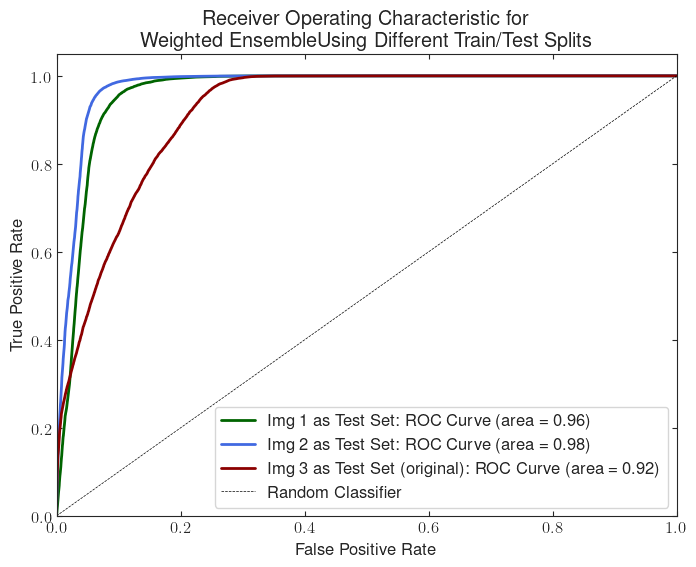

In [23]:
# Plot all roc curves together

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Helvetica"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True

# Plot ROC curves
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=fpr_img1,
    y=tpr_img1,
    label=f'Img 1 as Test Set: ROC Curve (area = {roc_auc_img1:.2f})',
    lw=2,
    color="darkgreen",
    errorbar=None
)
sns.lineplot(
    x=fpr_img2,
    y=tpr_img2,
    label=f'Img 2 as Test Set: ROC Curve (area = {roc_auc_img2:.2f})',
    lw=2,
    color="royalblue",
    errorbar=None)
sns.lineplot(
    x=roc_data_original["fpr"],
    y=roc_data_original["tpr"],
    label=f'Img 3 as Test Set (original): ROC Curve (area = {auc_original:.2f})',
    lw=2,
    color="darkred",
    errorbar=None)
sns.lineplot(x=[0, 1], y=[0, 1], color='black', lw=0.5, linestyle='--', errorbar=None, label="Random Classifier")

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for\nWeighted EnsembleUsing Different Train/Test Splits')
plt.legend(loc="lower right")
plt.savefig("../../../figs/roc_stability.pdf")
plt.show()